In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2

In [8]:
sum(data['category']==1)

2120

In [9]:
data_x = data['image']
labels = data['category'].replace({1:1,2:0,3:0,4:0,5:0})

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# splitting the traindata into training and validation data
train_X,valid_X,train_Y,valid_Y = train_test_split(data_x,labels,test_size=0.2,train_size=0.8)

In [12]:
train_X.shape

(5001,)

In [13]:
def pre_process(data): 
    data = data
    #x = np.array(data['image'])
    #la = np.array(data['category'])
    new = []
    for i in data:
        y = cv2.imread(i , 1)
        res = cv2.resize(y , (210,126))
        new.append(res)
    new = np.array(new)
    print(data.info())
    print(data.describe())
    return new

In [14]:
train_x = pre_process(train_X)

<class 'pandas.core.series.Series'>
Int64Index: 5001 entries, 6036 to 4828
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
5001 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB
None
count            5001
unique           5001
top       2862159.jpg
freq                1
Name: image, dtype: object


In [15]:
train_x.shape

(5001, 126, 210, 3)

In [16]:
Unrolled_array = train_x.reshape(126*210*3,train_x.shape[0])
Normed_array = Unrolled_array/255.

In [17]:
# preparing the validation set
valid_x = pre_process(valid_X)
valid_unrolled = valid_x.reshape(126*210*3,valid_x.shape[0])
valid_x = valid_unrolled/255.
valid_y = valid_Y.values.reshape((1,valid_Y.shape[0]))

<class 'pandas.core.series.Series'>
Int64Index: 1251 entries, 5067 to 1788
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
1251 non-null   object
dtypes: object(1)
memory usage: 19.5+ KB
None
count            1251
unique           1251
top       2770996.jpg
freq                1
Name: image, dtype: object


In [18]:
Normed_array.shape

(79380, 5001)

In [19]:
train_Y.shape

(5001,)

In [20]:
train_y = train_Y.values.reshape((1,train_Y.shape[0]))

In [21]:
train_y.shape

(1, 5001)

In [22]:
test_data = pd.read_csv('test.csv')
x = test_data['image']
test = []
for i in x:
    y = cv2.imread(i , 1)
    res = cv2.resize(y , (210,126))
    test.append(res)
test = np.array(test)
print(data.info())
print(data.describe())
test_unrolled_array = test.reshape(126*210*3,2680 )
test_normed_array = test_unrolled_array/255.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     6252 non-null   object
 1   category  6252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.8+ KB
None
          category
count  6252.000000
mean      2.657550
std       1.528998
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000


In [23]:
test.shape

(2680, 126, 210, 3)

In [34]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations = 3,print_cost=True):
    np.random.seed(1)
    costs = [] # keep track of cost

    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

    # Compute cost.
        cost = deep_compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # Update parameters.
        parameters = deep_update_parameters(parameters, grads, learning_rate)

        # Print the cost every 1 training example
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)

            # plot the cost
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per hundreds)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

    return parameters,costs

In [36]:
def deep_predict(parameters, X,Y):
    A2, cache = L_model_forward(X, parameters)
    predictions = (A2 > 0.5)
    print("accuracy: {} %".format(100 - np.mean(np.abs(predictions - Y)) * 100))
    return predictions

In [37]:
Normed_array.shape

(79380, 5001)

In [50]:
N = np.random.randint(low=2, high=50, size=(5,))
r = np.random.uniform(low=-3,high=1,size=(5,))
lr = 10**r

In [51]:
lr

array([0.00151872, 0.00153542, 0.71467849, 0.05313592, 0.01031096])

In [52]:
N

array([37, 23, 26, 27,  7])

Cost after iteration 0: 0.693212


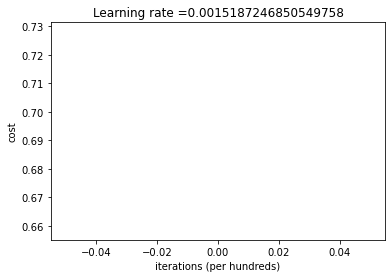

Cost after iteration 1: 0.693176


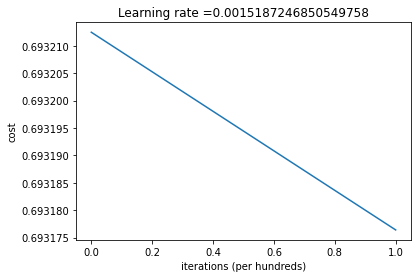

Cost after iteration 2: 0.693140


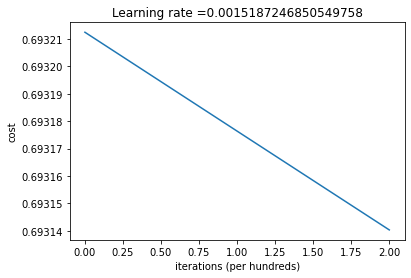

accuracy: 66.1867626474705 %
number of units  37
learning rate  0.0015187246850549758
Cost after iteration 0: 0.693212


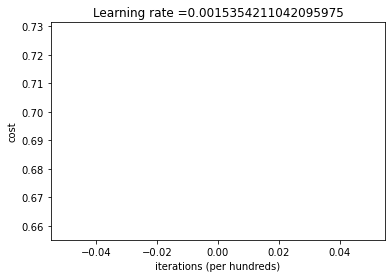

Cost after iteration 1: 0.693176


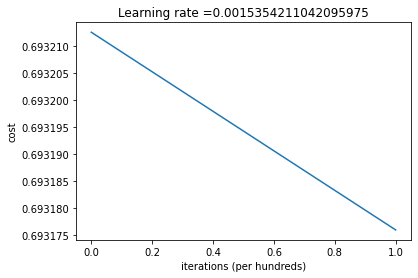

Cost after iteration 2: 0.693140


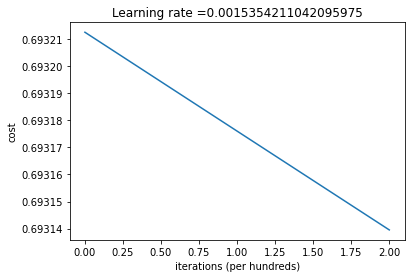

accuracy: 66.1867626474705 %
number of units  37
learning rate  0.0015354211042095975
Cost after iteration 0: 0.693212


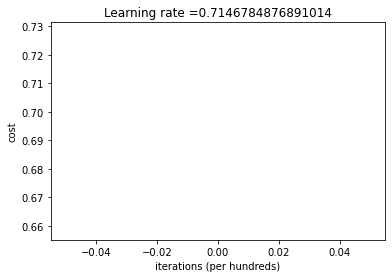

Cost after iteration 1: 0.677750


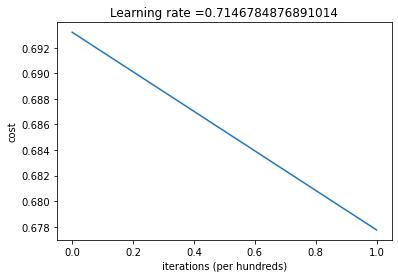

Cost after iteration 2: 0.667330


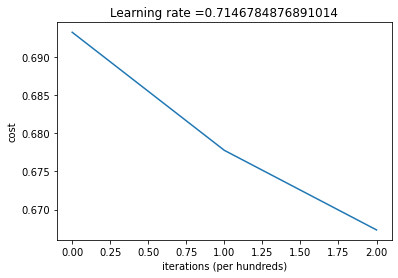

accuracy: 66.26674665066986 %
number of units  37
learning rate  0.7146784876891014
Cost after iteration 0: 0.693212


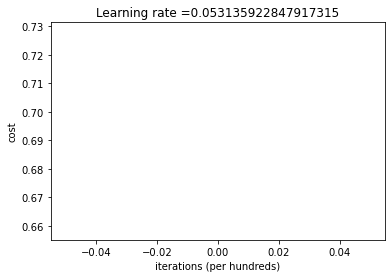

Cost after iteration 1: 0.691958


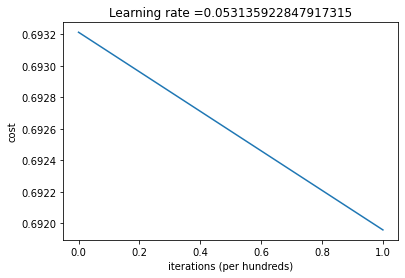

Cost after iteration 2: 0.690736


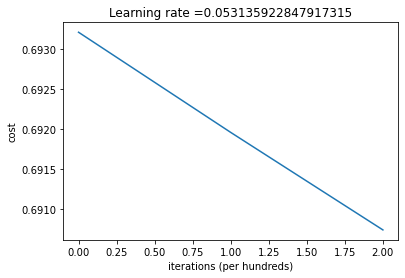

accuracy: 66.26674665066986 %
number of units  37
learning rate  0.053135922847917315
Cost after iteration 0: 0.693212


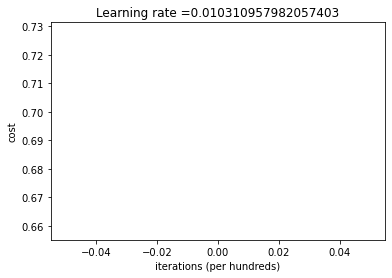

Cost after iteration 1: 0.692968


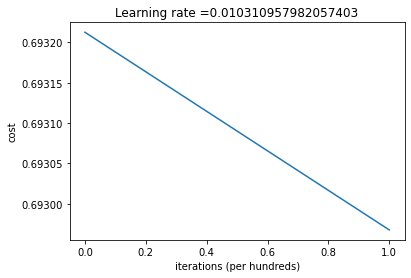

Cost after iteration 2: 0.692724


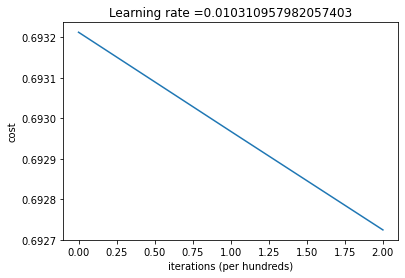

accuracy: 66.26674665066986 %
number of units  37
learning rate  0.010310957982057403
Cost after iteration 0: 0.693156


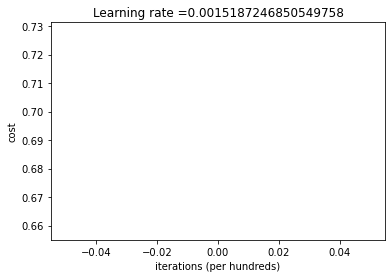

Cost after iteration 1: 0.693120


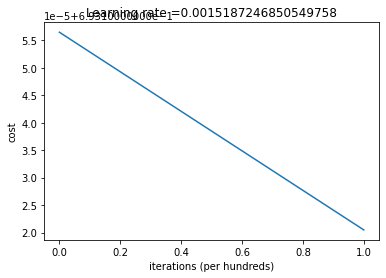

Cost after iteration 2: 0.693085


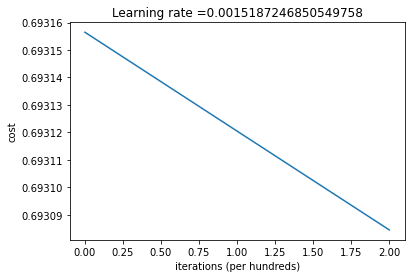

accuracy: 66.26674665066986 %
number of units  23
learning rate  0.0015187246850549758
Cost after iteration 0: 0.693156


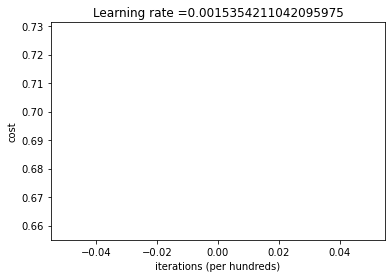

Cost after iteration 1: 0.693120


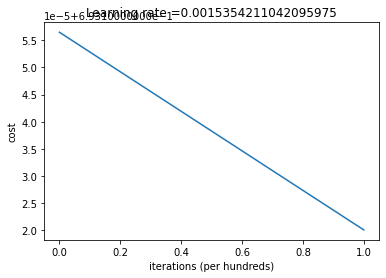

Cost after iteration 2: 0.693084


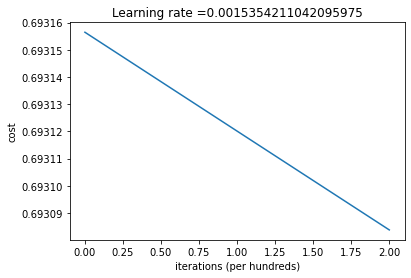

accuracy: 66.26674665066986 %
number of units  23
learning rate  0.0015354211042095975
Cost after iteration 0: 0.693156


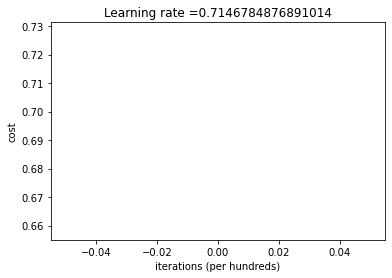

Cost after iteration 1: 0.677735


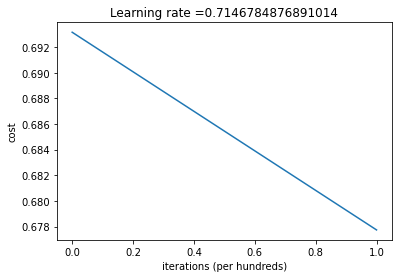

Cost after iteration 2: 0.667330


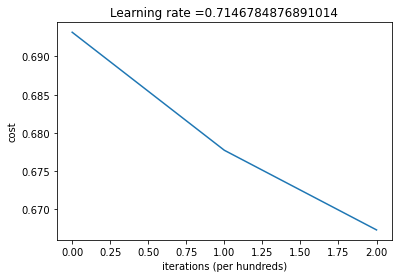

accuracy: 66.26674665066986 %
number of units  23
learning rate  0.7146784876891014
Cost after iteration 0: 0.693156


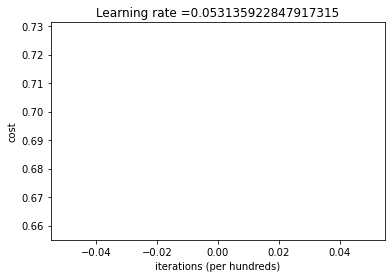

Cost after iteration 1: 0.691905


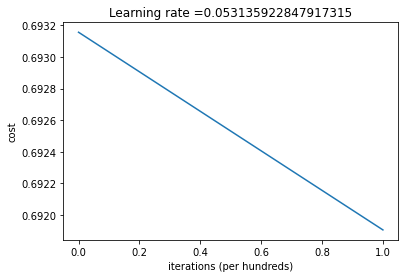

Cost after iteration 2: 0.690688


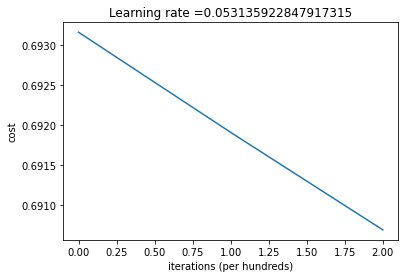

accuracy: 66.26674665066986 %
number of units  23
learning rate  0.053135922847917315
Cost after iteration 0: 0.693156


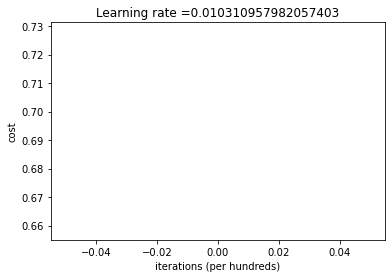

Cost after iteration 1: 0.692912


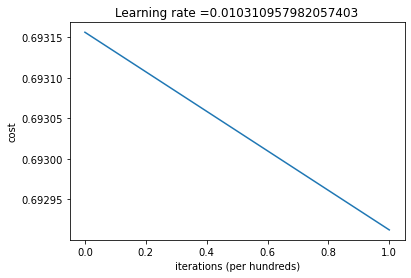

Cost after iteration 2: 0.692670


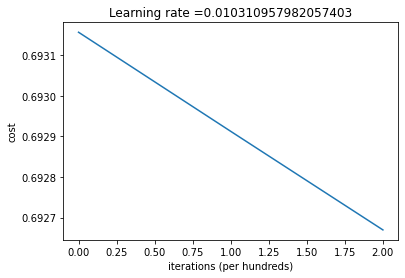

accuracy: 66.26674665066986 %
number of units  23
learning rate  0.010310957982057403
Cost after iteration 0: 0.693135


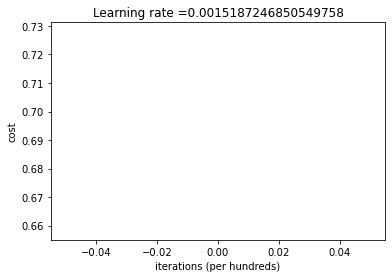

Cost after iteration 1: 0.693099


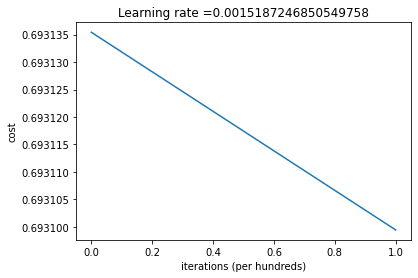

Cost after iteration 2: 0.693063


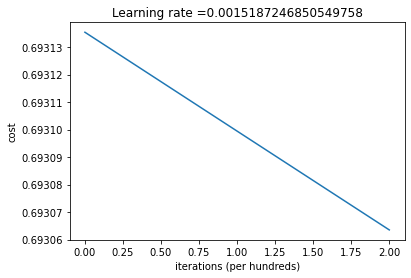

accuracy: 66.26674665066986 %
number of units  26
learning rate  0.0015187246850549758
Cost after iteration 0: 0.693135


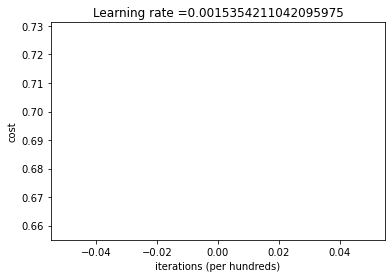

Cost after iteration 1: 0.693099


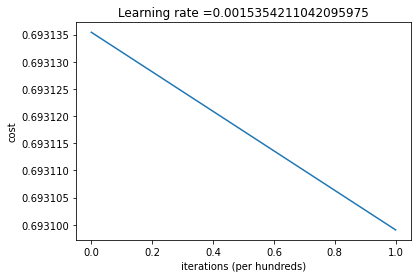

Cost after iteration 2: 0.693063


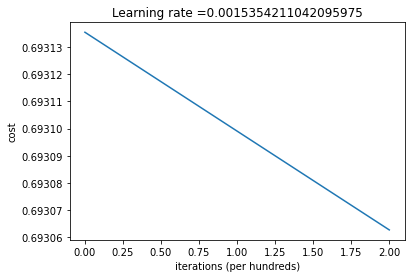

accuracy: 66.26674665066986 %
number of units  26
learning rate  0.0015354211042095975
Cost after iteration 0: 0.693135


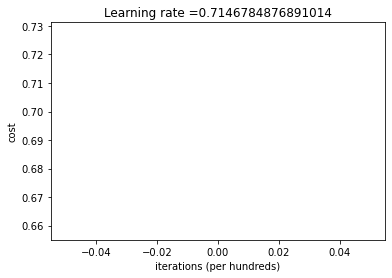

Cost after iteration 1: 0.677715


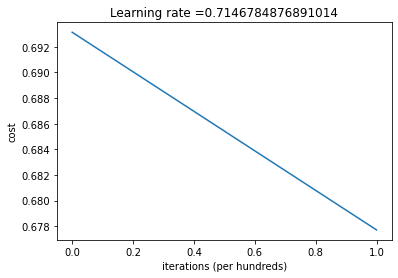

Cost after iteration 2: 0.667306


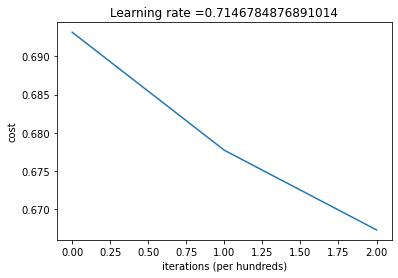

accuracy: 66.26674665066986 %
number of units  26
learning rate  0.7146784876891014
Cost after iteration 0: 0.693135


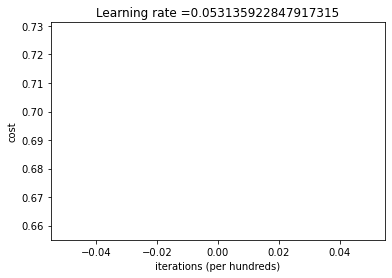

Cost after iteration 1: 0.691885


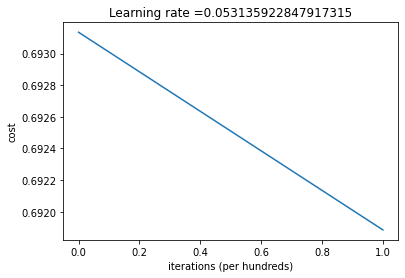

Cost after iteration 2: 0.690667


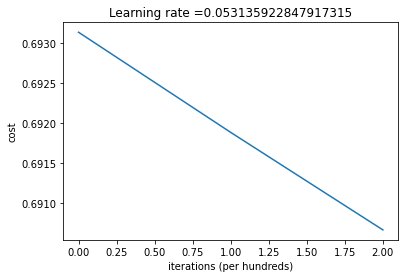

accuracy: 66.26674665066986 %
number of units  26
learning rate  0.053135922847917315
Cost after iteration 0: 0.693135


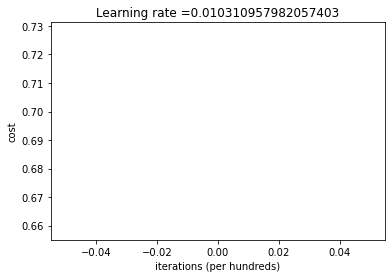

Cost after iteration 1: 0.692891


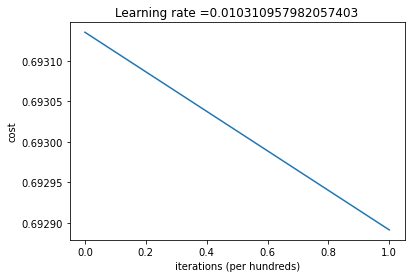

Cost after iteration 2: 0.692649


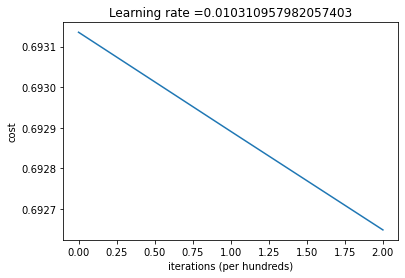

accuracy: 66.26674665066986 %
number of units  26
learning rate  0.010310957982057403
Cost after iteration 0: 0.693117


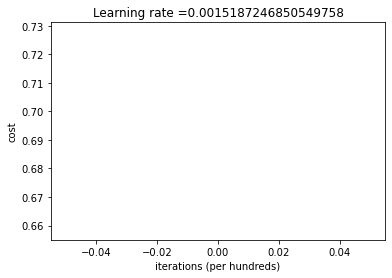

Cost after iteration 1: 0.693081


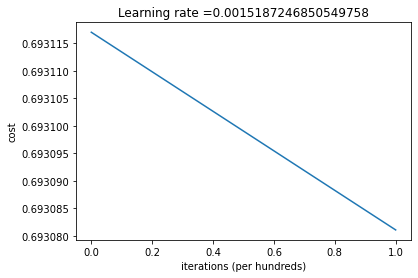

Cost after iteration 2: 0.693045


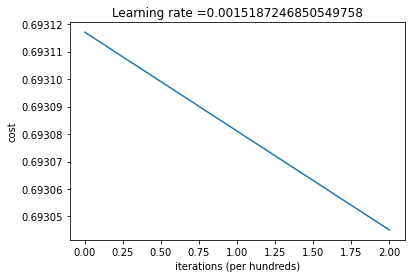

accuracy: 66.26674665066986 %
number of units  27
learning rate  0.0015187246850549758
Cost after iteration 0: 0.693117


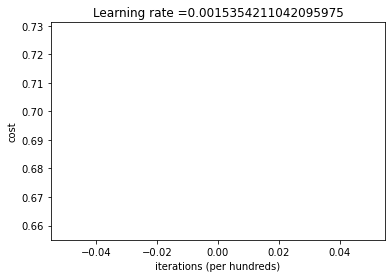

Cost after iteration 1: 0.693081


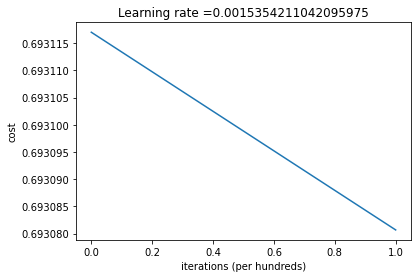

Cost after iteration 2: 0.693044


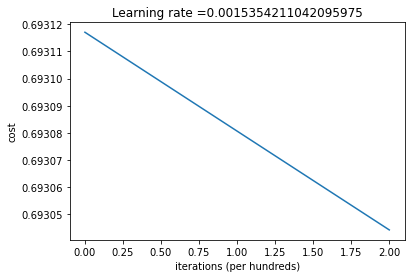

accuracy: 66.26674665066986 %
number of units  27
learning rate  0.0015354211042095975
Cost after iteration 0: 0.693117


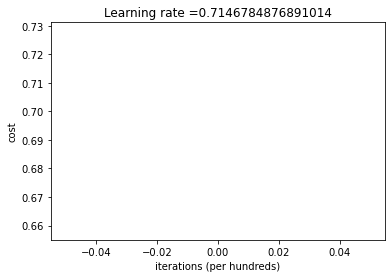

Cost after iteration 1: 0.677696


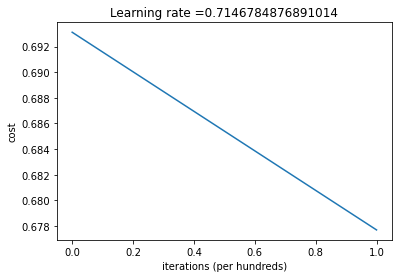

Cost after iteration 2: 0.667284


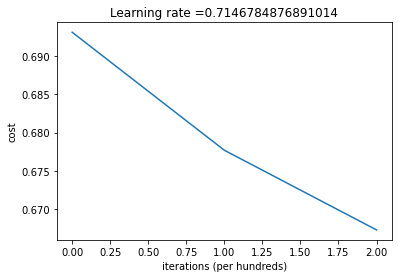

accuracy: 66.26674665066986 %
number of units  27
learning rate  0.7146784876891014
Cost after iteration 0: 0.693117


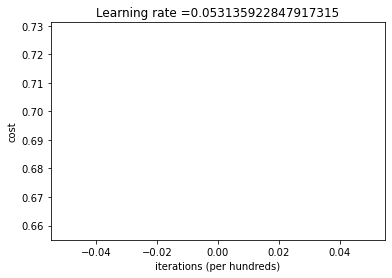

Cost after iteration 1: 0.691866


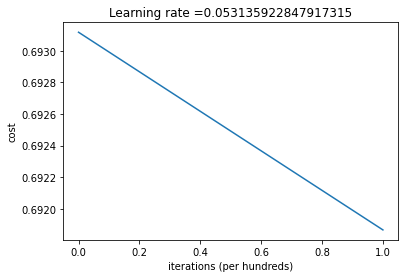

Cost after iteration 2: 0.690649


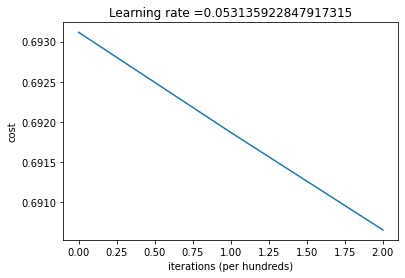

accuracy: 66.26674665066986 %
number of units  27
learning rate  0.053135922847917315
Cost after iteration 0: 0.693117


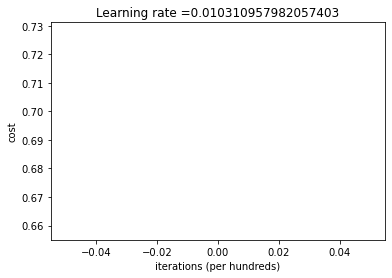

Cost after iteration 1: 0.692873


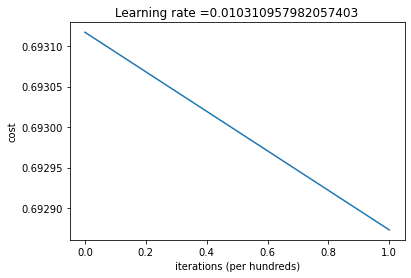

Cost after iteration 2: 0.692630


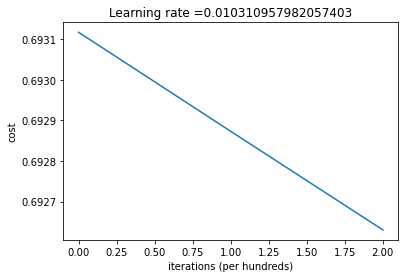

accuracy: 66.26674665066986 %
number of units  27
learning rate  0.010310957982057403
Cost after iteration 0: 0.693150


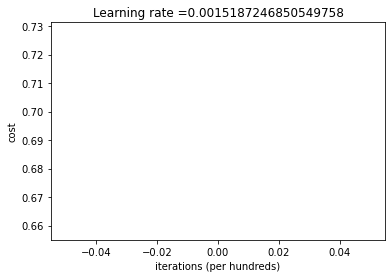

Cost after iteration 1: 0.693114


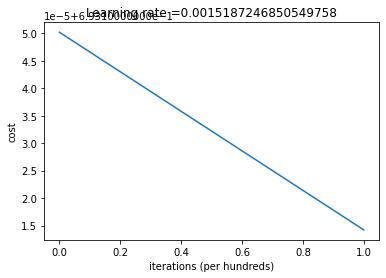

Cost after iteration 2: 0.693078


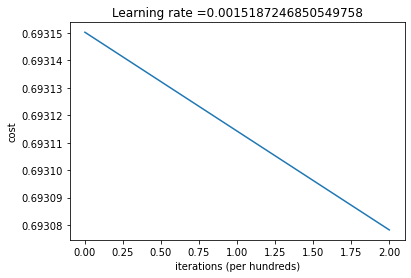

accuracy: 66.26674665066986 %
number of units  7
learning rate  0.0015187246850549758
Cost after iteration 0: 0.693150


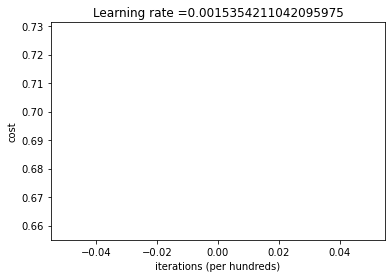

Cost after iteration 1: 0.693114


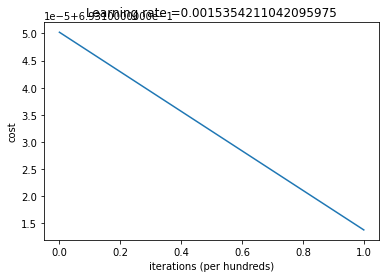

Cost after iteration 2: 0.693077


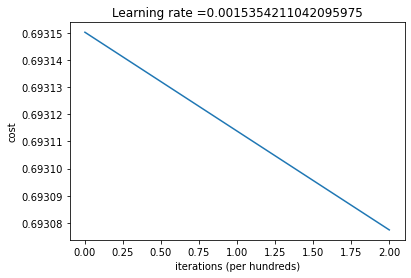

accuracy: 66.26674665066986 %
number of units  7
learning rate  0.0015354211042095975
Cost after iteration 0: 0.693150


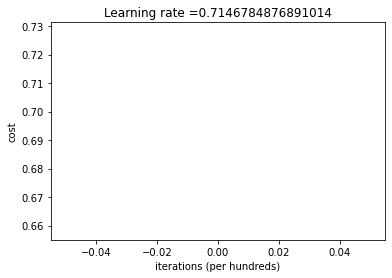

Cost after iteration 1: 0.677726


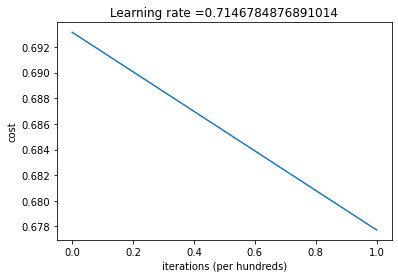

Cost after iteration 2: 0.667319


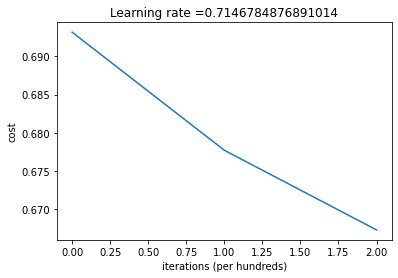

accuracy: 66.26674665066986 %
number of units  7
learning rate  0.7146784876891014
Cost after iteration 0: 0.693150


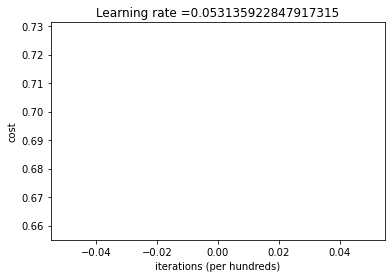

Cost after iteration 1: 0.691899


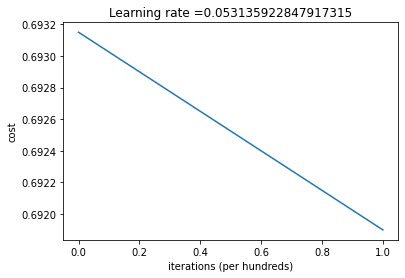

Cost after iteration 2: 0.690681


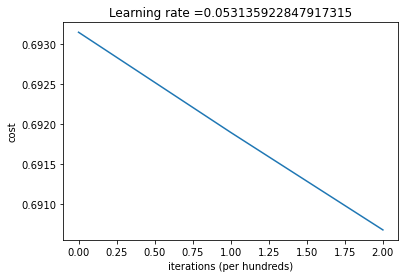

accuracy: 66.26674665066986 %
number of units  7
learning rate  0.053135922847917315
Cost after iteration 0: 0.693150


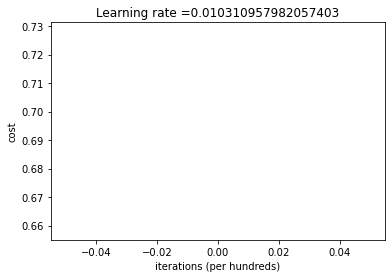

Cost after iteration 1: 0.692906


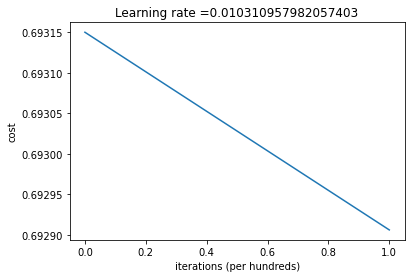

Cost after iteration 2: 0.692663


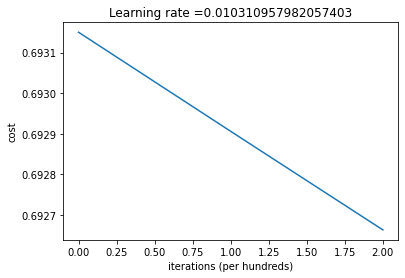

accuracy: 66.26674665066986 %
number of units  7
learning rate  0.010310957982057403


In [57]:
# gridsearch
N = list(N)
lr = list(lr)
for i in N:
    for j in lr:
        layers_dims_train = [79380,1251]+[i]+[4,1]
        p,train_deep_costs = L_layer_model(valid_x,valid_y,layers_dims_train,j)
        deep_trainpreds = deep_predict(p,Normed_array,train_y)    
        print('number of units ',i)
        print('learning rate ',j)
    

IMPLEMENTING REGULARIZATION TECHNIQUES

In [145]:
from ipynb.fs.full.utilsnew import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from ipynb.fs.full.utilsnew import compute_cost, predict, forward_propagation, backward_propagation, update_parameters

In [146]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))    ### END CODER HERE ###
    
    cost = cost + L2_regularization_cost
    
    return cost

In [147]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))

    dW2 = 1./m * np.dot(dZ2, A1.T) +  lambd/m*W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m*W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [148]:
# no need to change this function (it is already implemented for you).
def model(X, Y, learning_rate, layer_dims,lambd, num_iterations = 3, print_cost = True, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layer_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [175]:
N = np.random.randint(2,50,size=(5,))
lr = 10**(np.random.uniform(low=np.log10(0.001),high=np.log10(10),size=(5,1)))
print(N,lr)
for j in lr:
    print(j[0])

[ 7 32  2  4 25] [[0.02349685]
 [0.05381624]
 [0.35745468]
 [0.10313023]
 [0.42638269]]
0.023496845396618223
0.05381624366824877
0.35745467881933507
0.10313023154222109
0.4263826897435928


Cost after iteration 0: 0.6587076831771309


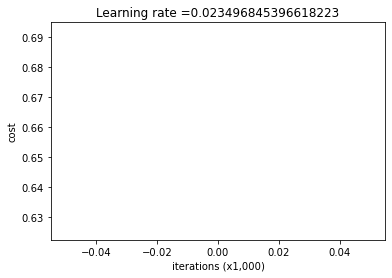

number of hidden units:  7 learning rate:  0.023496845396618223
Accuracy: 0.653876898481215
Cost after iteration 0: 0.6587076831771309


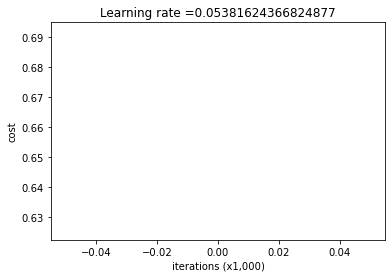

number of hidden units:  7 learning rate:  0.05381624366824877
Accuracy: 0.4148681055155875
Cost after iteration 0: 0.6587076831771309


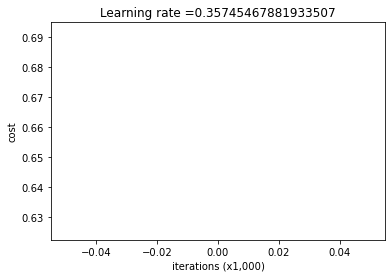

number of hidden units:  7 learning rate:  0.35745467881933507
Accuracy: 0.34612310151878495
Cost after iteration 0: 0.6587076831771309


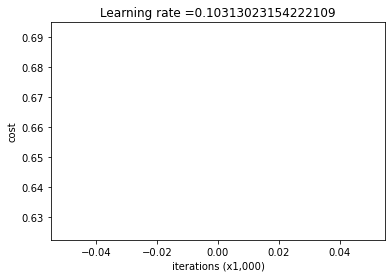

number of hidden units:  7 learning rate:  0.10313023154222109
Accuracy: 0.34612310151878495
Cost after iteration 0: 0.6587076831771309


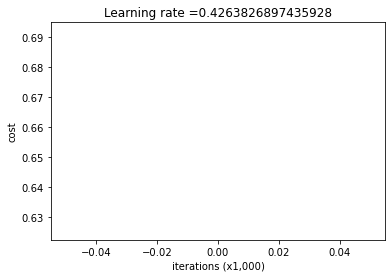

number of hidden units:  7 learning rate:  0.4263826897435928
Accuracy: 0.34612310151878495
Cost after iteration 0: 0.6554822947885285


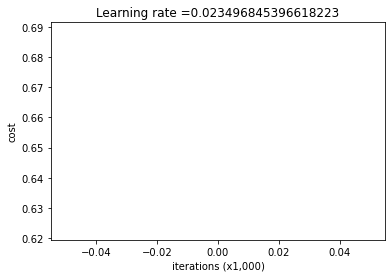

number of hidden units:  32 learning rate:  0.023496845396618223
Accuracy: 0.653876898481215
Cost after iteration 0: 0.6554822947885285


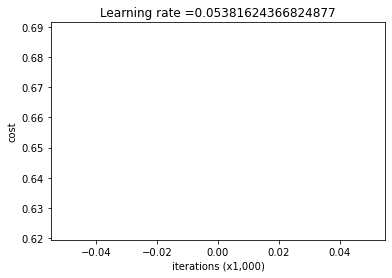

number of hidden units:  32 learning rate:  0.05381624366824877
Accuracy: 0.653876898481215
Cost after iteration 0: 0.6554822947885285


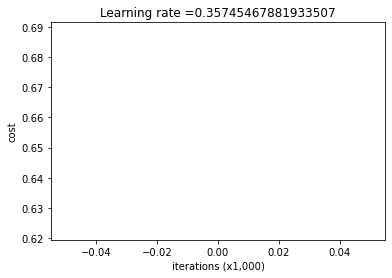

number of hidden units:  32 learning rate:  0.35745467881933507
Accuracy: 0.34612310151878495
Cost after iteration 0: 0.6554822947885285


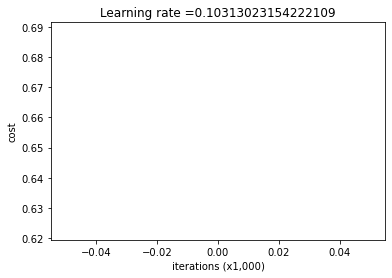

number of hidden units:  32 learning rate:  0.10313023154222109
Accuracy: 0.34612310151878495
Cost after iteration 0: 0.6554822947885285


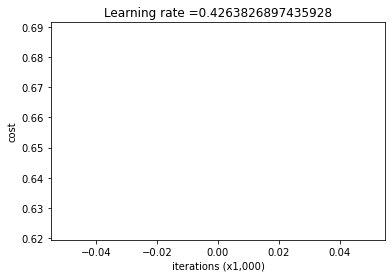

number of hidden units:  32 learning rate:  0.4263826897435928
Accuracy: 0.3469224620303757
Cost after iteration 0: 0.693621237463513


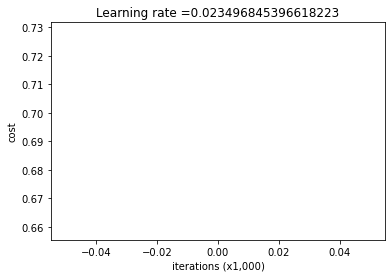

number of hidden units:  2 learning rate:  0.023496845396618223
Accuracy: 0.653876898481215
Cost after iteration 0: 0.693621237463513


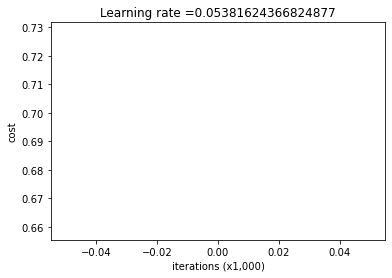

number of hidden units:  2 learning rate:  0.05381624366824877
Accuracy: 0.653876898481215
Cost after iteration 0: 0.693621237463513


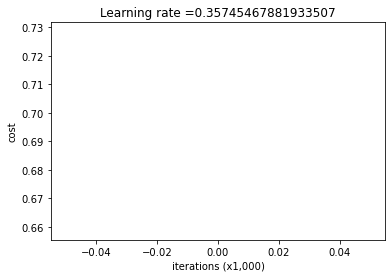

number of hidden units:  2 learning rate:  0.35745467881933507
Accuracy: 0.653876898481215
Cost after iteration 0: 0.693621237463513


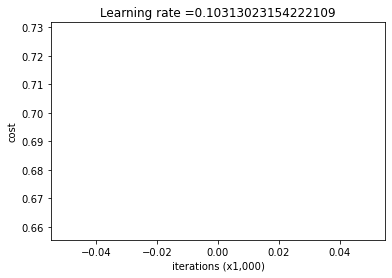

number of hidden units:  2 learning rate:  0.10313023154222109
Accuracy: 0.653876898481215
Cost after iteration 0: 0.693621237463513


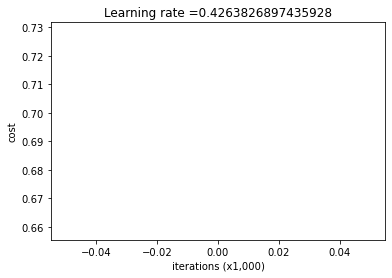

number of hidden units:  2 learning rate:  0.4263826897435928
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7182260678012937


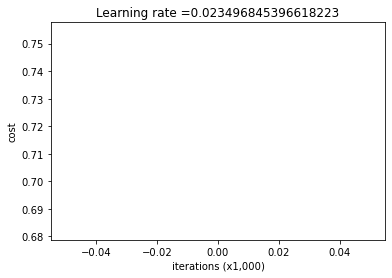

number of hidden units:  4 learning rate:  0.023496845396618223
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7182260678012937


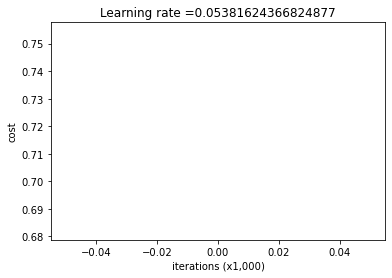

number of hidden units:  4 learning rate:  0.05381624366824877
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7182260678012937


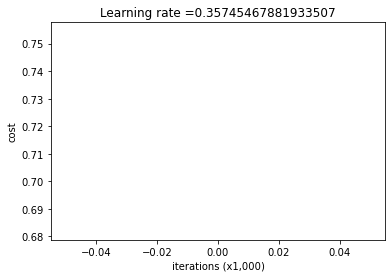

number of hidden units:  4 learning rate:  0.35745467881933507
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7182260678012937


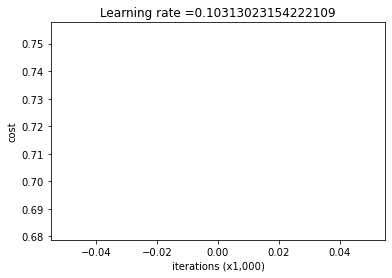

number of hidden units:  4 learning rate:  0.10313023154222109
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7182260678012937


/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/utilsnew.ipynb:24: RuntimeWarning: overflow encountered in exp
  "\n",
/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/utilsnew.ipynb:241: RuntimeWarning: divide by zero encountered in log
  "    cost - value of the cost function\n",
/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/utilsnew.ipynb:241: RuntimeWarning: invalid value encountered in multiply
  "    cost - value of the cost function\n",


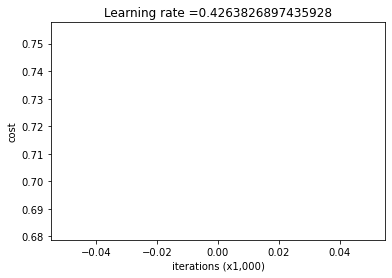

number of hidden units:  4 learning rate:  0.4263826897435928
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7413958720248807


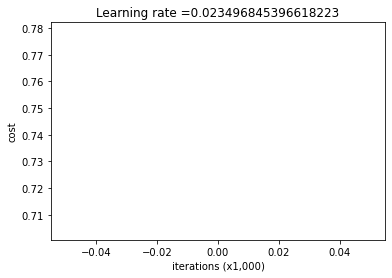

number of hidden units:  25 learning rate:  0.023496845396618223
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7413958720248807


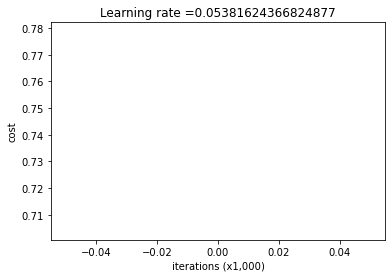

number of hidden units:  25 learning rate:  0.05381624366824877
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7413958720248807


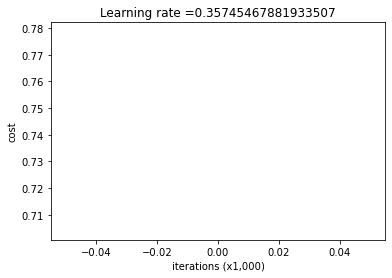

number of hidden units:  25 learning rate:  0.35745467881933507
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7413958720248807


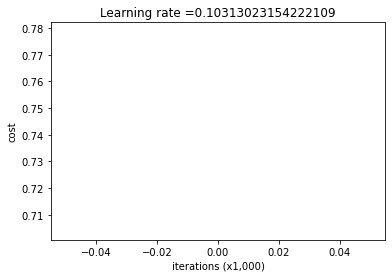

number of hidden units:  25 learning rate:  0.10313023154222109
Accuracy: 0.653876898481215
Cost after iteration 0: 0.7413958720248807


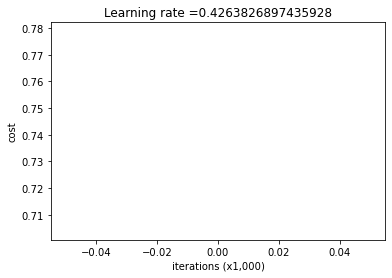

number of hidden units:  25 learning rate:  0.4263826897435928
Accuracy: 0.653876898481215


In [176]:
hiddenunits=[]
learningrate=[]
accuracy=[]
for i in N:
    for j in lr:
        ac=0
        layerd_train = [79380]+[i]+[4,1]
        parameters = model(X=Normed_array, Y=train_y, learning_rate=j[0],layer_dims=layerd_train,lambd= 0)
        print ("number of hidden units: ",i,"learning rate: ",j[0])
        predictions,ac = predict(valid_x, valid_y, parameters)
        hiddenunits.append(i)
        learningrate.append(j[0])
        accuracy.append(ac)


In [177]:
# considering learning rate =0.1 and number of units = 2

Cost after iteration 0: 0.6936769360168323


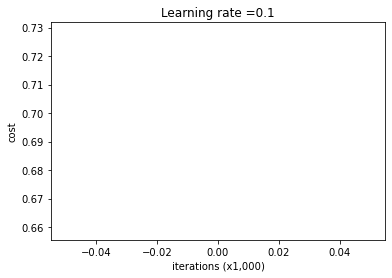

On the train set:
Accuracy: 0.6626674665066986


In [178]:
layerd_train = [79380,2,4,1]
parameters = model(X=Normed_array, Y=train_y, learning_rate=0.1,layer_dims=layerd_train,lambd= 0.1)
print ("On the train set:")
predictions_train = predict(Normed_array, train_y, parameters)

Cost after iteration 0: 0.6936769360168323


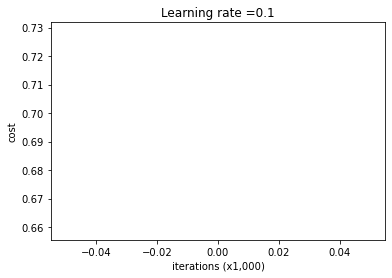

On the validation set:
Accuracy: 0.653876898481215


In [179]:
layerd_train = [79380,2,4,1]
parameters = model(X=Normed_array, Y=train_y, learning_rate=0.1,layer_dims=layerd_train,lambd= 0.1)
print ("On the validation set:")
predictions_train = predict(valid_x, valid_y, parameters)

Cost after iteration 0: 0.693621237463513


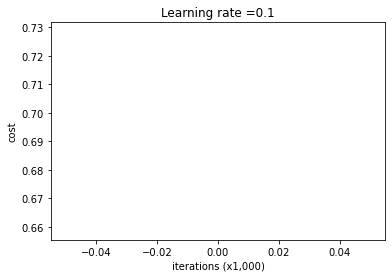

On the train set:
Accuracy: 0.6626674665066986


In [180]:
layerd_train = [79380,2,4,1]
parameters = model(X=Normed_array, Y=train_y, learning_rate=0.1,layer_dims=layerd_train,lambd= 0)
print ("On the train set:")
predictions_train = predict(Normed_array, train_y, parameters)

Cost after iteration 0: 0.693621237463513


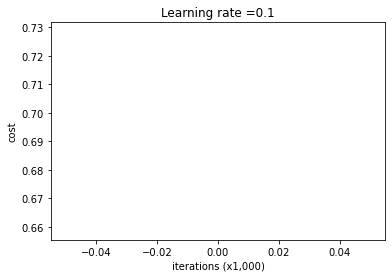

On the validation set:
Accuracy: 0.653876898481215


In [181]:
layerd_train = [79380,2,4,1]
parameters = model(X=Normed_array, Y=train_y, learning_rate=0.1,layer_dims=layerd_train,lambd= 0)
print ("On the validation set:")
predictions_train = predict(valid_x, valid_y, parameters)

In [120]:
test_labels = pd.read_excel('test_labels.xlsx')
test_labels = test_labels['category']
test_labels = test_labels.values.reshape((1,test_labels.shape[0]))

In [182]:
print ("On the test set:")
predictions_train = predict(test_normed_array, test_labels, parameters)

On the test set:
Accuracy: 0.6611940298507463
